In [23]:
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("../Data/tweets.csv")

In [25]:
df.sample(10)

,tweet
149,"['can', 'wait', 'watch', 'everyone', 'even']"
297,"['black', 'life', 'matter', 'today', 'day']"
6,"['cometh', 'inside', 'dy', 'eye', 'ness', 'smo..."
225,"['first', 'new', 'custom', 'pan', 'er', 'dr', ..."
430,"['coolest', 'life', 'hack', 'brazilian', 'gold..."
326,"['smile', 'filter', 'inst', 'mood', 'pick', 'd..."
362,"['mon', 'note', 'hit', 'stoke', 'go', 'far', '..."
265,"['dont', 'even', 'think', 'wear', 'dad', 'jean']"
69,"['can', 'believe', 'left', 'school', '5', 'yea..."
347,"['3434', 'sunday', '3434']"


In [26]:
df['tweet'] = df['tweet'].apply(ast.literal_eval)

In [33]:
df.sample(10)

,tweet
316,"[big, day, majesty]"
453,"[kid, afraid, go, wait]"
29,"[try, not, try, know, love, 2, 3, rd, light, h..."
379,"[can, wait, join, u, garden, walk]"
22,"[mind, like, 12, body, like, 12, sleep, still]"
318,"[live, color, check, new, tone, bag, color, li..."
173,"[laugh, fact, of, z, use, pp, talk, u, feel, i..."
87,"[final, countdown, office, u, public, june, 1,..."
415,"[weekend, she, may, time, friend, family, summ..."
376,"[new, tenant, collect, key, 9, prove, hand, mo..."


In [28]:
print(df['tweet'].iloc[0])

['studio', 'life', 'life', 'require', 'passion', 'devil', 'willow', 'find', 'new', 'mater']


In [ ]:
# Flattening tokens from all tweets into a single list:
tokens = [token for sublist in df['tweet'] for token in sublist]

In [35]:
tokens

['studio',
 'life',
 'life',
 'require',
 'passion',
 'devil',
 'willow',
 'find',
 'new',
 'mater',
 'white',
 'supremacist',
 'want',
 'everyone',
 'see',
 'new',
 'bird',
 'move',
 'safe',
 'way',
 'heal',
 'an',
 'at',
 'way',
 'heal',
 'health',
 'heal',
 'he',
 'cure',
 'child',
 'book',
 'reserve',
 'already',
 'ye',
 'harris',
 'porter',
 'porter',
 'favorite',
 '3',
 'rd',
 'big',
 'day',
 'may',
 'filaria',
 'nephew',
 'epi',
 'ah',
 'mr',
 'uncle',
 'dave',
 'love',
 'miss',
 'choose',
 'mon',
 'tip',
 'cometh',
 'inside',
 'dy',
 'eye',
 'ness',
 'smoke',
 'eye',
 'tire',
 'lone',
 'wrung',
 'finish',
 'tattoo',
 'ink',
 'ink',
 'love',
 'it',
 'iii',
 'iii',
 'thank',
 'al',
 'were',
 'never',
 'understand',
 'dad',
 'left',
 'young',
 'deep',
 'feel',
 'device',
 'food',
 'love',
 'life',
 'capetown',
 'manna',
 'epics',
 'rest',
 'u',
 'want',
 '1000',
 'day',
 'wast',
 'narcosi',
 'infinite',
 'up',
 'make',
 'war',
 'grind',
 'neuro',
 'bass',
 'lifestyle',
 'one',
 'w

#### Zipf’s Law:

    In a corpus, the frequency of a word is inversely proportional to its rank:
    f(r)∝ 1/r^s

    where r is rank and s ≈ 1.

In [36]:
from collections import Counter

In [40]:
# Applying Zipf's law
freq = Counter(tokens)
sorted_items = sorted(freq.items(), key = lambda x: x[1],reverse = True)
words, freqs = zip(*sorted_items)
ranks = range(1, len(freqs) + 1)


#### Heap’s Law:

    Describes how the vocabulary size (V) grows with the number of tokens (N).

    Formula:
    V(N)=k N^β

    where 0.4 ≤ β ≤ 0.6 and k is a constant.

In [41]:
# Applying Heap's law
vocab = set()
vocab_size = []
token_counts = []

for i, word in enumerate(tokens, 1):
    vocab.add(word)
    vocab_size.append(len(vocab))
    token_counts.append(i)

#### Plotting both in subplots

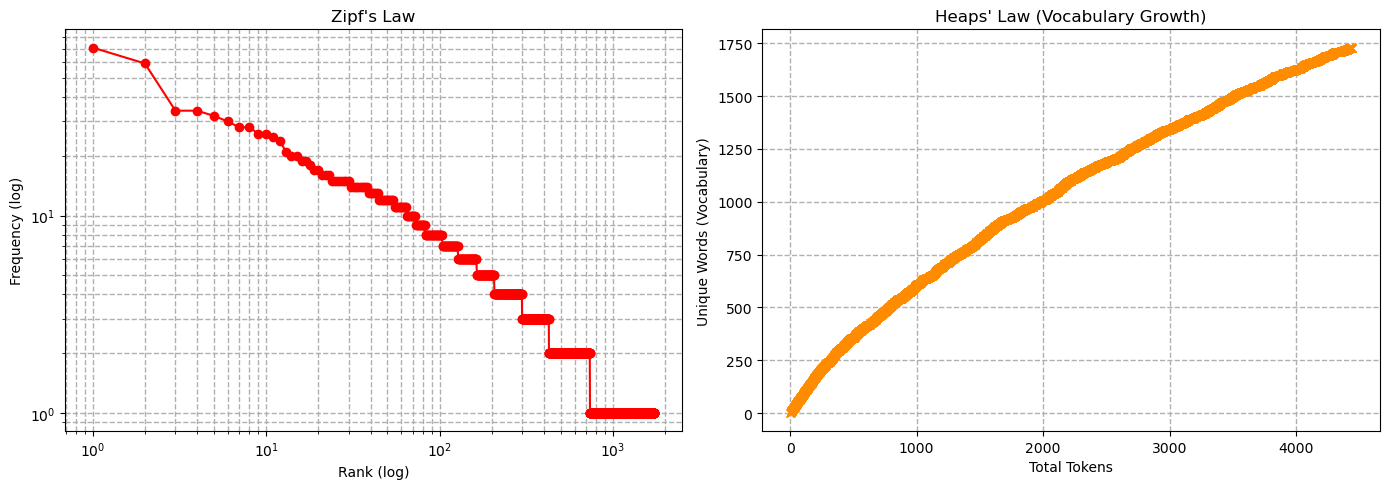

In [44]:
# Zipf’s Law Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].loglog(ranks, freqs, marker='o', color='red')
axs[0].set_title("Zipf's Law")
axs[0].set_xlabel("Rank (log)")
axs[0].set_ylabel("Frequency (log)")
axs[0].grid(True, which='both', linestyle='--', linewidth=1)

# Heaps’ Law Plot
axs[1].plot(token_counts, vocab_size, marker='x', color='darkorange')
axs[1].set_title("Heaps' Law (Vocabulary Growth)")
axs[1].set_xlabel("Total Tokens")
axs[1].set_ylabel("Unique Words (Vocabulary)")
axs[1].grid(True, linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()